Shape of X_train:  (8, 614)
Shape of Y_train:  (1, 614)
Shape of X_test:  (8, 154)
Shape of Y_test:  (1, 154)
Cost after 0 iterations: 0.6931471605599454
Cost after 10000 iterations: 0.4680494102747583
Cost after 20000 iterations: 0.46801525027667273
Cost after 30000 iterations: 0.4680151899060321
Cost after 40000 iterations: 0.46801518977098056
Cost after 50000 iterations: 0.4680151897706403
Cost after 60000 iterations: 0.46801518977063883
Cost after 70000 iterations: 0.4680151897706389
Cost after 80000 iterations: 0.4680151897706389
Cost after 90000 iterations: 0.4680151897706389


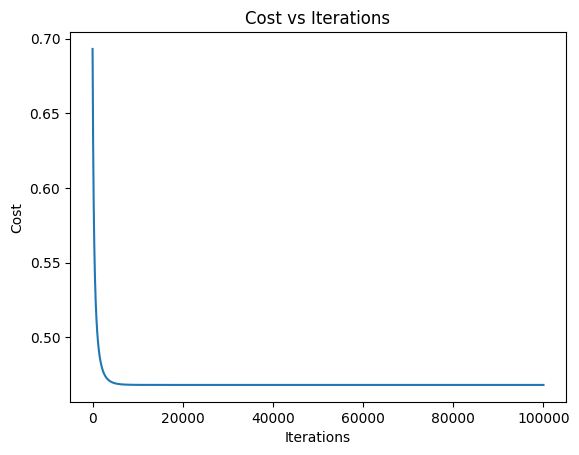

Accuracy of the model is: 75.32 %


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("DIABETICS DATASET.csv")

# Extract features (X) and labels (Y)
X = data.drop("Outcome", axis=1).values
Y = data["Outcome"].values

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T
X_test = scaler.transform(X_test).T

Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression model with L2 regularization
def model(X, Y, learning_rate, iterations, lambda_reg):
    m = X.shape[1]
    n = X.shape[0]
    W = np.zeros((n, 1))
    B = 0
    cost_list = []
    
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # Cost function with L2 regularization
        cost = -(1/m) * np.sum(Y * np.log(A + 1e-8) + (1-Y) * np.log(1-A + 1e-8)) + (lambda_reg/(2*m)) * np.sum(np.square(W))
        
        # Gradient Descent with L2 regularization
        dW = (1/m) * np.dot(A-Y, X.T) + (lambda_reg/m) * W.T
        dB = (1/m) * np.sum(A - Y)
        
        W = W - learning_rate * dW.T
        B = B - learning_rate * dB
        
        # Keep track of the cost function value
        cost_list.append(cost)
        if i % (iterations/10) == 0:
            print("Cost after", i, "iterations:", cost)
    
    return W, B, cost_list

# Train the model using the training set
iterations = 100000
learning_rate = 0.005  # Lowered the learning rate for stability
lambda_reg = 0.1  # Adding a small regularization term
W, B, cost_list = model(X_train, Y_train, learning_rate, iterations, lambda_reg)

# Plot the cost function to see if it decreases
plt.plot(np.arange(iterations), cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

# Define the accuracy function
def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype='int64')
    acc = (1 - np.sum(np.abs(A - Y)) / Y.shape[1]) * 100
    print("Accuracy of the model is:", round(acc, 2), "%")

# Test the model accuracy using the test set
accuracy(X_test, Y_test, W, B)
